# Import Data

In [1]:
#First import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Import CSV file

crime = pd.read_csv('clean_data/KCPD_Crime_Data_2017_clean.csv')

moon = pd.read_csv('clean_data/Moon_Data_2017_cleaned.csv')

In [5]:
crime.head()

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-10-04,16:00,690,Stealing All Other,221.0,400 W 58 ST,KANSAS CITY,64113,U,U,NaN,N,"400 W 58 ST\nKANSAS CITY 64113\n(39.022397, -9..."
1,2017-03-20,11:30,630,Stealing Shoplifting,332.0,3500 PROSPECT AV,KANSAS CITY,64127,NaN,NaN,NaN,N,3500 PROSPECT AV\nKANSAS CITY 64127\n
2,2017-01-15,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
3,2017-01-05,11:40,1849,Possession/Sale/Dist,122.0,1100 TROOST AV,KANSAS CITY,64106,NaN,NaN,NaN,N,"1100 TROOST AV\nKANSAS CITY 64106\n(39.10068, ..."
4,2017-01-27,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."


In [6]:
moon.head()

,Date,Moon Phase,Illumination
0,2017-01-01,Waxing Crescent,10%
1,2017-01-02,Waxing Crescent,17%
2,2017-01-03,Waxing Crescent,26%
3,2017-01-04,Waxing Crescent,36%
4,2017-01-05,First Quarter,47%


In [30]:
# Create a plot of number of crimes per day vs. moon phase by day

#First we want group number of crime by  date

crime_grouped_by_day = crime.groupby(['Date']).count().reset_index()


In [31]:
crime_grouped_by_day

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-01-01,444,444,444,444,444,444,444,401,401,260,444,444
1,2017-01-02,341,341,341,341,341,341,341,278,278,180,341,341
2,2017-01-03,315,319,319,315,319,319,319,277,277,159,319,319
3,2017-01-04,302,302,302,301,302,302,302,260,260,154,302,302
4,2017-01-05,264,264,264,264,264,264,264,222,222,142,264,264
5,2017-01-06,282,282,282,282,282,282,282,238,238,150,282,282
6,2017-01-07,302,302,302,302,302,302,302,265,265,165,302,302
7,2017-01-08,243,243,243,240,243,243,243,221,221,140,243,243
8,2017-01-09,431,431,431,431,431,431,431,372,372,230,431,431
9,2017-01-10,384,384,384,384,384,384,384,331,331,212,384,384


# Merge the Datasets

In [32]:
#NOW IT'S TIME TO MERGE!

fulldata = pd.merge(moon,crime_grouped_by_day, on='Date', how='left')

In [33]:
fulldata

,Date,Moon Phase,Illumination,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-01-01,Waxing Crescent,10%,444,444,444,444,444,444,444,401,401,260,444,444
1,2017-01-02,Waxing Crescent,17%,341,341,341,341,341,341,341,278,278,180,341,341
2,2017-01-03,Waxing Crescent,26%,315,319,319,315,319,319,319,277,277,159,319,319
3,2017-01-04,Waxing Crescent,36%,302,302,302,301,302,302,302,260,260,154,302,302
4,2017-01-05,First Quarter,47%,264,264,264,264,264,264,264,222,222,142,264,264
5,2017-01-06,Waxing Gibbous,58%,282,282,282,282,282,282,282,238,238,150,282,282
6,2017-01-07,Waxing Gibbous,69%,302,302,302,302,302,302,302,265,265,165,302,302
7,2017-01-08,Waxing Gibbous,79%,243,243,243,240,243,243,243,221,221,140,243,243
8,2017-01-09,Waxing Gibbous,88%,431,431,431,431,431,431,431,372,372,230,431,431
9,2017-01-10,Waxing Gibbous,94%,384,384,384,384,384,384,384,331,331,212,384,384


# Time to Plot the Data

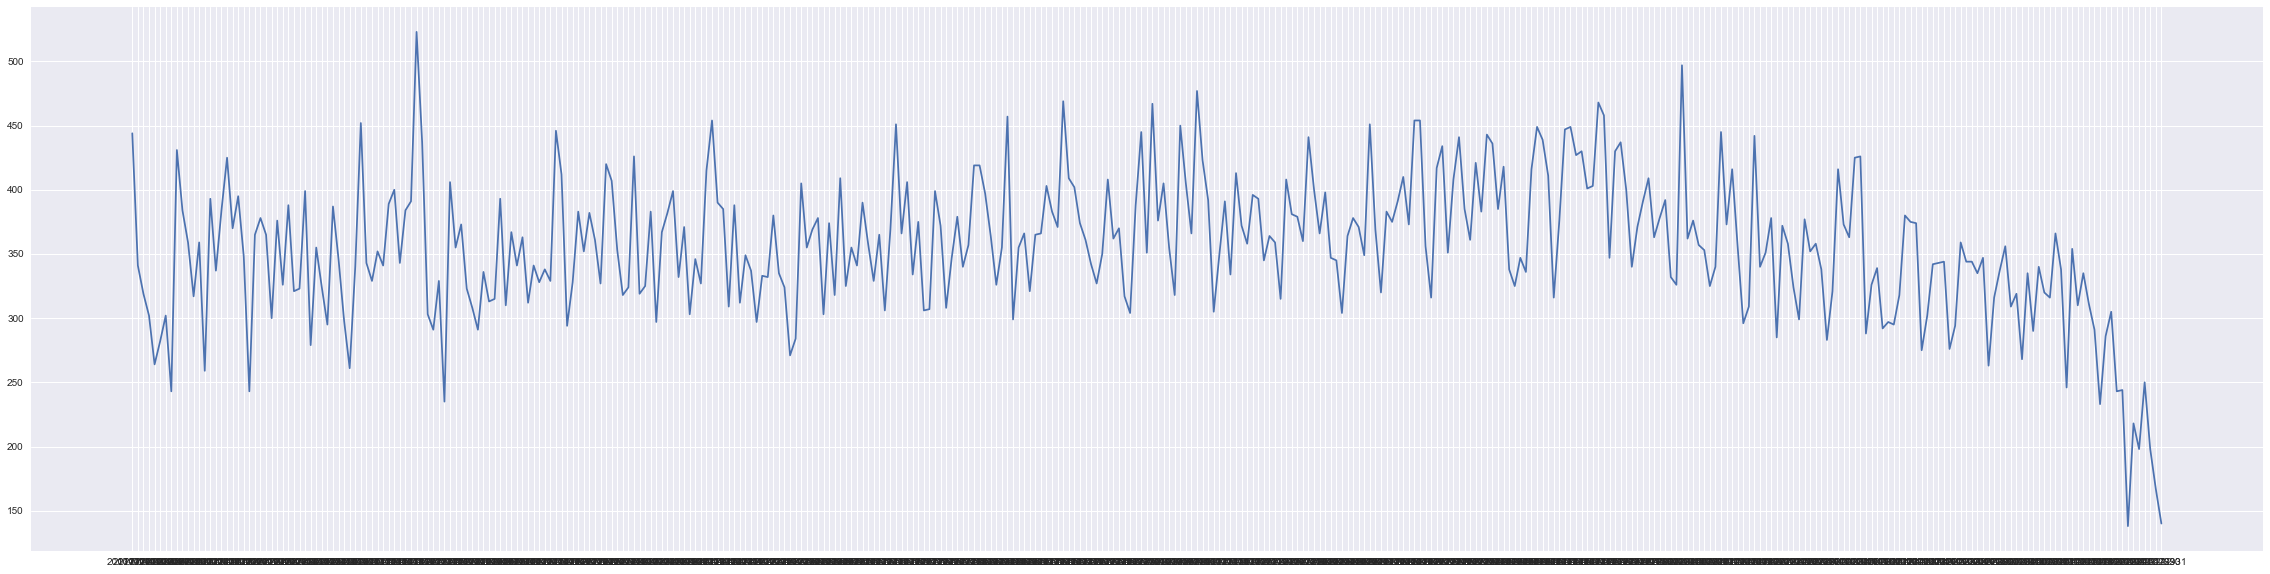

In [34]:
#Plot the number of crime by date

x = fulldata['Date']
y =fulldata['Offense']


crime_by_date = plt.plot(x, y)

fig = plt.gcf()
fig.set_size_inches(40,10)

sns.set(style="darkgrid")

plt.show(crime_by_date)

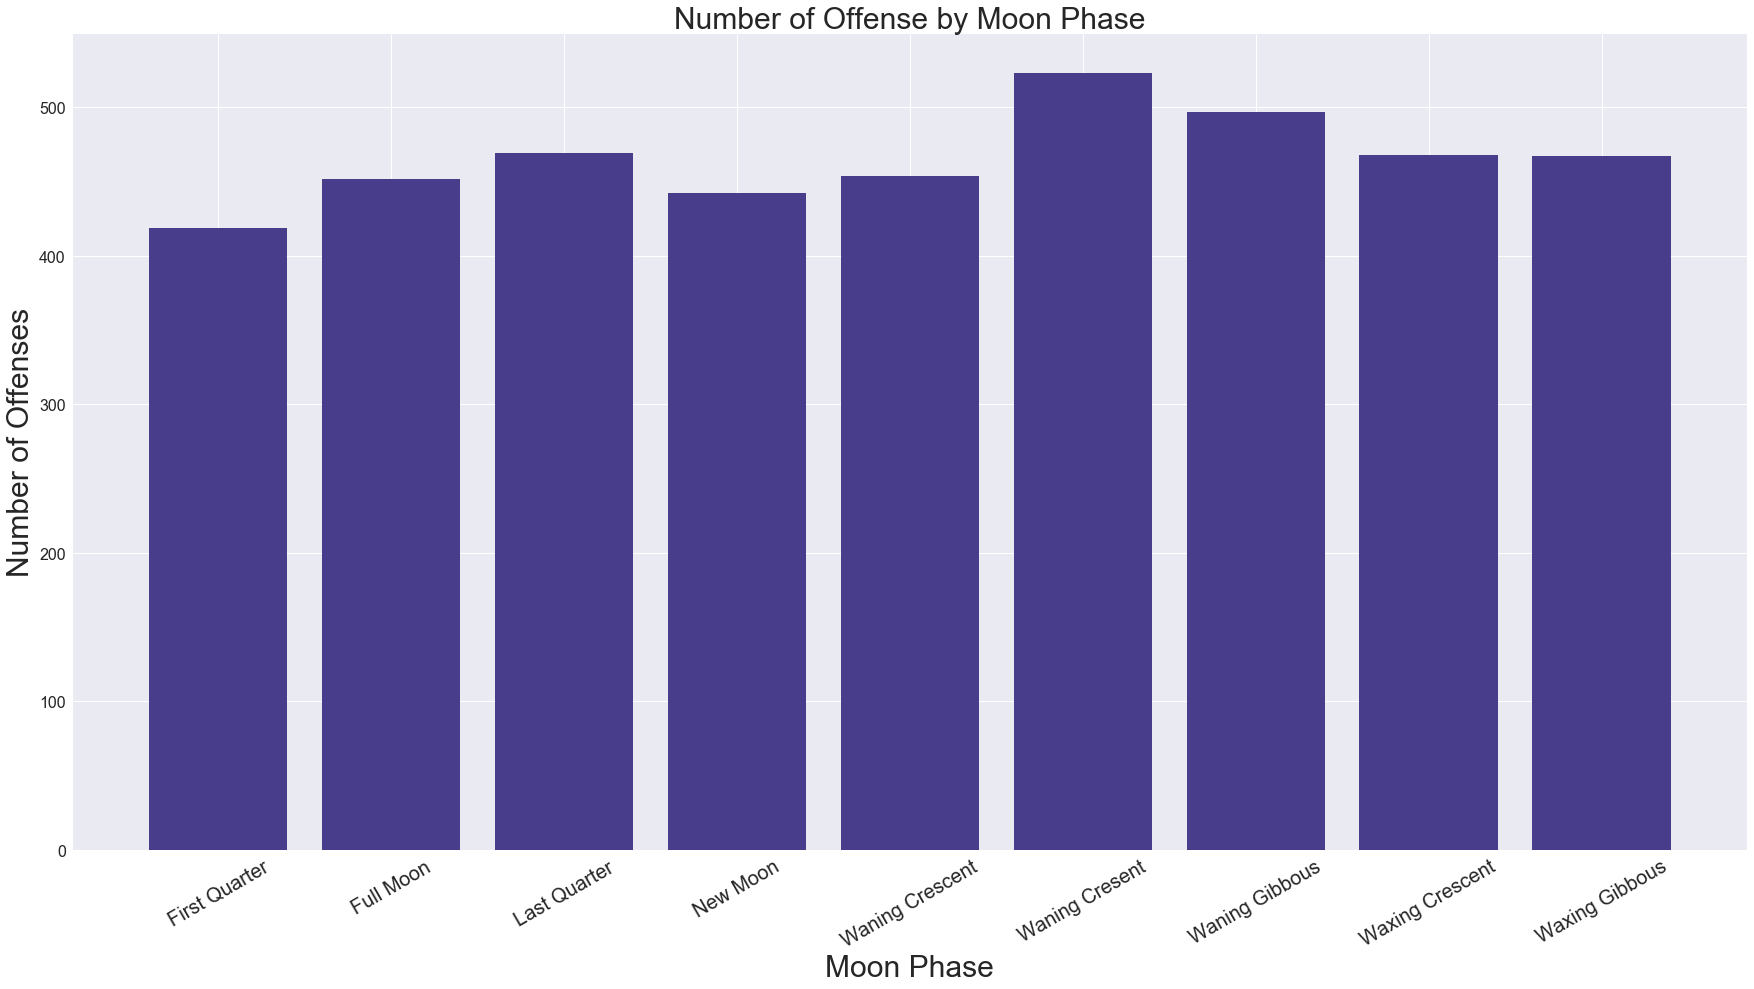

In [35]:
#Plot the number of crime by moon phase

#add labels and such
sns.set(style="darkgrid")
plt.title("Number of Offense by Moon Phase", fontsize =30)
plt.xlabel("Moon Phase", fontsize=30)
plt.ylabel("Number of Offenses", fontsize =30)

x = fulldata['Moon Phase']
y =fulldata['Offense']

plt.xticks(rotation=30,fontsize =20)
plt.yticks(fontsize =16)

crime_by_moonphase= plt.bar(x, y, color = "DarkSlateBlue")

fig = plt.gcf()
fig.set_size_inches(30,15)

sns.set(style="darkgrid")

#save an image of the plot to the output folder
plt.savefig('Pics/CrimebyMoonPhase.png')

#show plot
plt.show(crime_by_moonphase)